<a href="https://colab.research.google.com/github/Victorbenavides/CargaYDescarga_De_Bateria/blob/main/CargaYDescargaDeBateria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df = pd.read_csv("Battery_RUL.csv")
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


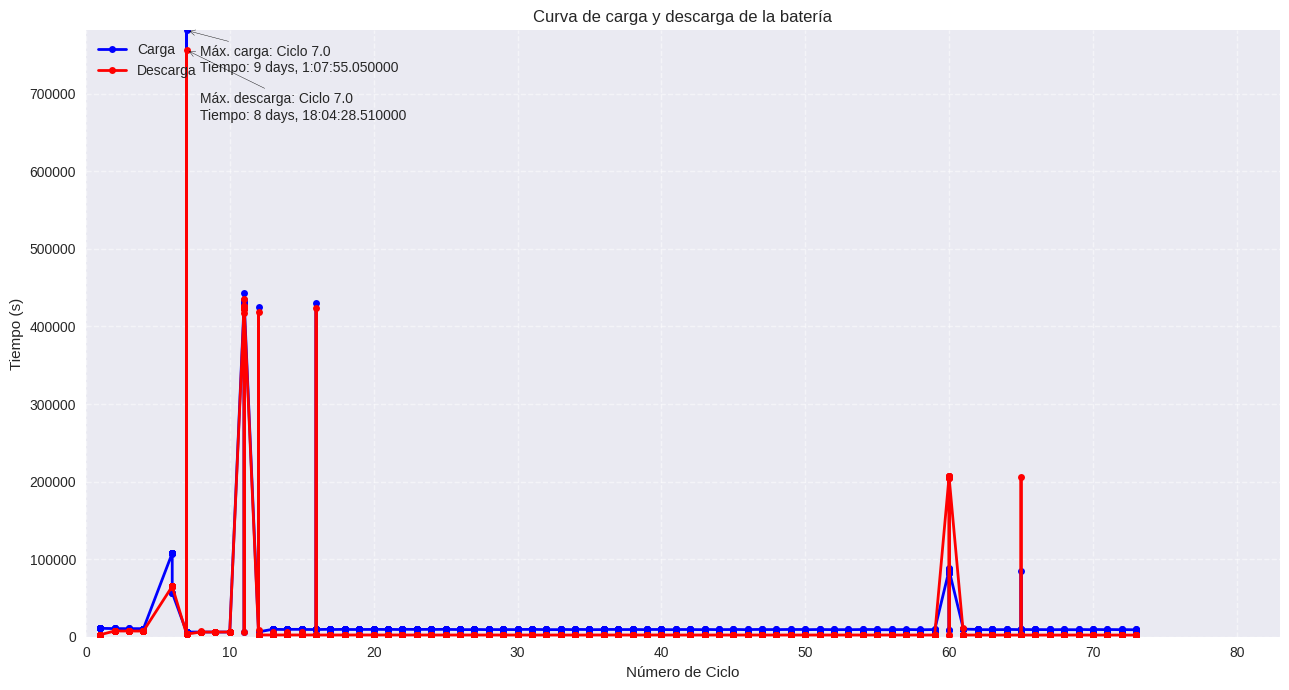

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Cargar el dataset desde el archivo CSV
df = pd.read_csv('Battery_RUL.csv')

# Ordenar los datos por ciclo
df.sort_values(by='Cycle_Index', inplace=True)

# Tomar las primeras 200 líneas de ciclos
df = df.head(1000)

# Configuración de estilo
plt.style.use('seaborn')

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(13, 7))

# Graficar la curva de carga
ax.plot(df['Cycle_Index'], df['Charging time (s)'], label='Carga', color='blue', linewidth=2, marker='o', markersize=5)

# Graficar la curva de descarga
ax.plot(df['Cycle_Index'], df['Discharge Time (s)'], label='Descarga', color='red', linewidth=2, marker='o', markersize=5)

# Configurar etiquetas y título del gráfico
ax.set_xlabel('Número de Ciclo')
ax.set_ylabel('Tiempo (s)')
ax.set_title('Curva de carga y descarga de la batería')

# Mostrar leyenda en la esquina superior izquierda
ax.legend(loc='upper left')

# Agregar una cuadrícula al gráfico
ax.grid(True, linestyle='--', alpha=0.5)

# Obtener el ciclo y tiempo de carga máximo
max_charge_cycle = df['Cycle_Index'].loc[df['Charging time (s)'].idxmax()]
max_charge_time = df['Charging time (s)'].max()

# Obtener el ciclo y tiempo de descarga máximo
max_discharge_cycle = df['Cycle_Index'].loc[df['Discharge Time (s)'].idxmax()]
max_discharge_time = df['Discharge Time (s)'].max()

# Convertir el tiempo máximo de carga y descarga a formato de horas y minutos
max_charge_time = str(datetime.timedelta(seconds=max_charge_time))
max_discharge_time = str(datetime.timedelta(seconds=max_discharge_time))

# Agregar etiquetas y líneas para los valores máximos
ax.annotate(f'Máx. carga: Ciclo {max_charge_cycle}\nTiempo: {max_charge_time}',
             xy=(max_charge_cycle, df['Charging time (s)'].max()),
             xytext=(10, -30), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='black'))
ax.annotate(f'Máx. descarga: Ciclo {max_discharge_cycle}\nTiempo: {max_discharge_time}',
             xy=(max_discharge_cycle, df['Discharge Time (s)'].max()),
             xytext=(10, -50), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='black'))

# Configurar límites de los ejes
ax.set_xlim(0, df['Cycle_Index'].max() + 10)
ax.set_ylim(0, max(df['Charging time (s)'].max(), df['Discharge Time (s)'].max()) + 100)

# Ajustar los márgenes del gráfico
plt.tight_layout()

# Guardar el gráfico en un archivo
plt.savefig('battery_curves.png')

# Mostrar el gráfico
plt.show()